In [86]:
import numpy as np
import pandas as pd

In [101]:
### kaggleのdiscussionから引用 https://www.kaggle.com/code/eyadamin1233/classify-gamers-mentality

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',200)
df = pd.read_csv("GamingStudy_data.csv", encoding = 'ISO-8859-1')

In [102]:
df

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,highestleague,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,Other,PC,8.0,I play for fun,having fun,NaN,NaN,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,2,6,5,2,2,Other,PC,0.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,Female,32,Employed,Bachelor (or equivalent),Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,2,5,5,3,2,Other,PC,20.0,I play for fun,improving,NaN,NaN,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,Male,28,Employed,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,2,2,4,5,1,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,14246,42057.75678,1,0,0,1,0,1,1,Not difficult at all,6,6,5,5,6,Other,"Console (PS, Xbox, ...)",40.0,I play for fun,improving,NaN,NaN,10.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,Male,22,Student at college / university,Master (or equivalent),France,France,Reddit,Multiplayer - online - with strangers,Accept,4,28,7.0,FRA,FRA
13460,14247,42057.81185,3,3,3,3,2,3,3,Extremely difficult,5,5,5,4,4,League of Legends,PC,20.0,I play for fun,winning,NaN,NaN,20.0,0.0,1.0,2.0,2.0,0.0,1.0,3.0,3.0,2.0,1.0,4.0,0.0,2.0,2.0,1.0,0.0,1.0,2.0,Female,20,Student at college / university,High school diploma (or equivalent),USA,USA,Reddit,Multiplayer - online - with strangers,Accept,20,23,25.0,USA,USA
13461,14248,42058.16964,0,0,0,0,0,0,0,Not difficult at all,6,6,7,7,6,Starcraft 2,PC,20.0,I play for fun,having fun,Gold,NaN,14.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,Male,19,Student at college / university,High school diploma (or equivalent),Norway,Norway,Reddit,Multiplayer - online - with real life friends,Accept,0,32,10.0,NOR,NOR
13462,14249,42058.24420,3,2,1,3,0,1,3,Somewhat difficult,2,6,3,2,3,Other,"Console (PS, Xbox, ...)",5.0,I play for fun,having fun,NaN,NaN,0.0,0.0,1.0,3.0,2.0,3.0,4.0,1.0,3.0,4.0,1.0,3.0,1.0,0.0,3.0,2.0,0.0,1.0,2.0,Female,18,Student at school,High school diploma (or equivalent),Canada,Canada,Reddit,Singleplayer,Accept,13,16,32.0,CAN,CAN


In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S. No.,13464.0,7096.839201,4114.478220,1.00000,3532.750000,7087.500000,10654.250000,14250.00000
Timestamp,13464.0,42054.841222,0.272948,42052.00437,42054.716548,42054.800675,42054.932112,42058.36375
GAD1,13464.0,0.860963,0.926542,0.00000,0.000000,1.000000,1.000000,3.00000
GAD2,13464.0,0.673351,0.915724,0.00000,0.000000,0.000000,1.000000,3.00000
GAD3,13464.0,0.965761,0.982776,0.00000,0.000000,1.000000,2.000000,3.00000
GAD4,13464.0,0.724079,0.921971,0.00000,0.000000,0.000000,1.000000,3.00000
GAD5,13464.0,0.488042,0.837014,0.00000,0.000000,0.000000,1.000000,3.00000
GAD6,13464.0,0.911022,0.931168,0.00000,0.000000,1.000000,1.000000,3.00000
GAD7,13464.0,0.588755,0.894408,0.00000,0.000000,0.000000,1.000000,3.00000
SWL1,13464.0,3.720440,1.736264,1.00000,2.000000,4.000000,5.000000,7.00000


In [104]:
df.dtypes

S. No.               int64
Timestamp          float64
GAD1                 int64
GAD2                 int64
GAD3                 int64
GAD4                 int64
GAD5                 int64
GAD6                 int64
GAD7                 int64
GADE                object
SWL1                 int64
SWL2                 int64
SWL3                 int64
SWL4                 int64
SWL5                 int64
Game                object
Platform            object
Hours              float64
earnings            object
whyplay             object
League              object
highestleague      float64
streams            float64
SPIN1              float64
SPIN2              float64
SPIN3              float64
SPIN4              float64
SPIN5              float64
SPIN6              float64
SPIN7              float64
SPIN8              float64
SPIN9              float64
SPIN10             float64
SPIN11             float64
SPIN12             float64
SPIN13             float64
SPIN14             float64
S

In [105]:
# 不要なカラムを削除して新しいDataFrameを作成
columns_to_drop = ['S. No.', 'Timestamp', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE', 'SWL1', 'SWL2',
                   'SWL3', 'SWL4', 'SWL5', 'Game', 'Platform', 'League', 'highestleague', 'SPIN1', 'SPIN2', 'SPIN3',
                   'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13',
                   'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism', 'Birthplace', 'Residence', 'Reference', 'accept',
                   'Residence_ISO3', 'Birthplace_ISO3']
df = df.drop(columns=columns_to_drop)

df

,Hours,earnings,whyplay,streams,Gender,Age,Work,Degree,Playstyle,GAD_T,SWL_T,SPIN_T
0,15.0,I play for fun,having fun,0.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),Singleplayer,1,23,5.0
1,8.0,I play for fun,having fun,2.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),Multiplayer - online - with strangers,8,16,33.0
2,0.0,I play for fun,having fun,0.0,Female,32,Employed,Bachelor (or equivalent),Singleplayer,8,17,31.0
3,20.0,I play for fun,improving,5.0,Male,28,Employed,Bachelor (or equivalent),Multiplayer - online - with online acquaintanc...,0,17,11.0
4,20.0,I play for fun,having fun,1.0,Male,19,Employed,High school diploma (or equivalent),Multiplayer - online - with strangers,14,14,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13459,40.0,I play for fun,improving,10.0,Male,22,Student at college / university,Master (or equivalent),Multiplayer - online - with strangers,4,28,7.0
13460,20.0,I play for fun,winning,20.0,Female,20,Student at college / university,High school diploma (or equivalent),Multiplayer - online - with strangers,20,23,25.0
13461,20.0,I play for fun,having fun,14.0,Male,19,Student at college / university,High school diploma (or equivalent),Multiplayer - online - with real life friends,0,32,10.0
13462,5.0,I play for fun,having fun,0.0,Female,18,Student at school,High school diploma (or equivalent),Singleplayer,13,16,32.0


In [106]:
df['earnings_g'] = df['earnings'].apply(lambda x: 1 if 'earn' in str(x) else 0)
df

,Hours,earnings,whyplay,streams,Gender,Age,Work,Degree,Playstyle,GAD_T,SWL_T,SPIN_T,earnings_g
0,15.0,I play for fun,having fun,0.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),Singleplayer,1,23,5.0,0
1,8.0,I play for fun,having fun,2.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),Multiplayer - online - with strangers,8,16,33.0,0
2,0.0,I play for fun,having fun,0.0,Female,32,Employed,Bachelor (or equivalent),Singleplayer,8,17,31.0,0
3,20.0,I play for fun,improving,5.0,Male,28,Employed,Bachelor (or equivalent),Multiplayer - online - with online acquaintanc...,0,17,11.0,0
4,20.0,I play for fun,having fun,1.0,Male,19,Employed,High school diploma (or equivalent),Multiplayer - online - with strangers,14,14,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,40.0,I play for fun,improving,10.0,Male,22,Student at college / university,Master (or equivalent),Multiplayer - online - with strangers,4,28,7.0,0
13460,20.0,I play for fun,winning,20.0,Female,20,Student at college / university,High school diploma (or equivalent),Multiplayer - online - with strangers,20,23,25.0,0
13461,20.0,I play for fun,having fun,14.0,Male,19,Student at college / university,High school diploma (or equivalent),Multiplayer - online - with real life friends,0,32,10.0,0
13462,5.0,I play for fun,having fun,0.0,Female,18,Student at school,High school diploma (or equivalent),Singleplayer,13,16,32.0,0


In [182]:
df['for_fun'] = df['whyplay'].apply(lambda x: 1 if 'fun' in str(x) else 0)
df['male'] = df['Gender'].apply(lambda x: 0 if 'Female' in str(x) else 1)
df['has_work'] = df['Work'].apply(lambda x: 1 if 'Employed' in str(x) else 0)
df['is_single_player'] = df['Playstyle'].apply(lambda x: 1 if 'Singleplayer' in str(x) else 0)
df['is_highly_educated'] = df['Degree'].apply(lambda x: 1 if ('Bachelor' in str(x)) or ('Master' in str(x)) else 0)

In [183]:
df

,Hours,earnings,whyplay,streams,Gender,Age,Work,Degree,Playstyle,GAD_T,SWL_T,SPIN_T,earnings_g,for_fun,male,has_work,is_single_player,is_highly_educated
0,15.0,I play for fun,having fun,0.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),Singleplayer,1,23,5.0,0,1,1,0,1,1
1,8.0,I play for fun,having fun,2.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),Multiplayer - online - with strangers,8,16,33.0,0,1,1,0,0,1
2,0.0,I play for fun,having fun,0.0,Female,32,Employed,Bachelor (or equivalent),Singleplayer,8,17,31.0,0,1,0,1,1,1
3,20.0,I play for fun,improving,5.0,Male,28,Employed,Bachelor (or equivalent),Multiplayer - online - with online acquaintanc...,0,17,11.0,0,0,1,1,0,1
4,20.0,I play for fun,having fun,1.0,Male,19,Employed,High school diploma (or equivalent),Multiplayer - online - with strangers,14,14,13.0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,40.0,I play for fun,improving,10.0,Male,22,Student at college / university,Master (or equivalent),Multiplayer - online - with strangers,4,28,7.0,0,0,1,0,0,1
13460,20.0,I play for fun,winning,20.0,Female,20,Student at college / university,High school diploma (or equivalent),Multiplayer - online - with strangers,20,23,25.0,0,0,0,0,0,0
13461,20.0,I play for fun,having fun,14.0,Male,19,Student at college / university,High school diploma (or equivalent),Multiplayer - online - with real life friends,0,32,10.0,0,1,1,0,0,0
13462,5.0,I play for fun,having fun,0.0,Female,18,Student at school,High school diploma (or equivalent),Singleplayer,13,16,32.0,0,1,0,0,1,0


In [184]:
df_for_principal = df[['for_fun', 'male', 'has_work', 'is_single_player', 'is_highly_educated']]

In [185]:
df_for_principal

,for_fun,male,has_work,is_single_player,is_highly_educated
0,1,1,0,1,1
1,1,1,0,0,1
2,1,0,1,1,1
3,0,1,1,0,1
4,1,1,1,0,0
...,...,...,...,...,...
13459,0,1,0,0,1
13460,0,0,0,0,0
13461,1,1,0,0,0
13462,1,0,0,1,0


In [186]:
limit_of_data = 1000

data = df_for_principal.to_numpy()
data = data[:limit_of_data, :]

In [187]:
len(data)

1000

In [189]:
principal_points = None

###STEP1データをインポートする###

(n,p)=np.shape(data)

###STEP1 Prinsipal Pointsの候補ベクトルを作成（ちょっとおしゃれな事やっています）###
pmatrix=np.empty((2**p,p))
for i in range(2**p):
    text = f"0{p}b"
    pmatrix[i,]=(list(format(i, text)))#0の後に変数の数がくる(ex.4変数のとき04b)


#Step2　principal pointsを探索
sum2=1000
for i in range (2**p-2):
    for j in range ((i+1),2**p-1):
        for k in range((j+1),2**p):    
            sum1=0
            for num in range (n):
                sum1=sum1+min(p-np.sum(pmatrix[i]==data[num]),p-np.sum(pmatrix[j]==data[num]),p-np.sum(pmatrix[k]==data[num]))
            if sum1<=sum2:
                sum2=sum1
                pp1=i
                pp2=j
                pp3=k
                print('距離',sum2)
                print(list(format(pp1, text)) ,list(format(pp2, text)),list(format(pp3, text)))
                
                principal_points = [list(format(pp1, text)), list(format(pp2, text)), list(format(pp3, text))]
                
print(principal_points)

距離 997
['0', '0', '0', '0', '0'] ['0', '0', '0', '1', '1'] ['0', '1', '0', '0', '0']
距離 892
['0', '0', '0', '0', '0'] ['0', '0', '1', '0', '1'] ['0', '1', '0', '0', '0']
距離 766
['0', '0', '0', '0', '0'] ['0', '1', '0', '0', '0'] ['0', '1', '0', '0', '1']
距離 646
['0', '0', '0', '0', '0'] ['0', '1', '0', '0', '0'] ['1', '1', '0', '0', '0']
距離 642
['0', '0', '0', '0', '1'] ['0', '1', '0', '0', '0'] ['1', '1', '0', '0', '0']
距離 640
['0', '0', '0', '1', '1'] ['0', '1', '0', '0', '0'] ['1', '1', '0', '0', '0']
距離 576
['0', '0', '1', '0', '1'] ['0', '1', '0', '0', '0'] ['1', '1', '0', '0', '0']
距離 518
['0', '1', '0', '0', '0'] ['0', '1', '0', '0', '1'] ['1', '1', '0', '0', '0']
距離 478
['0', '1', '0', '0', '0'] ['0', '1', '1', '0', '1'] ['1', '1', '0', '0', '0']
[['0', '1', '0', '0', '0'], ['0', '1', '1', '0', '1'], ['1', '1', '0', '0', '0']]


In [194]:
principal_points = [[int(value) for value in sublist] for sublist in principal_points]
principal_points

[[0, 1, 0, 0, 0], [0, 1, 1, 0, 1], [1, 1, 0, 0, 0]]

In [196]:
# 新しい特徴量の初期化
principal_features = np.zeros((len(df), 3), dtype=int)

# 各行に対して最も近いプリンシパルポイントを特定
for i, row in enumerate(df.iterrows()):
    distances = np.sum(np.abs(np.array(row[1][['for_fun', 'male', 'has_work', 'is_single_player', 'is_highly_educated']]) - np.array(principal_points)), axis=1)
    nearest_point_index = np.argmin(distances)
    principal_features[i, nearest_point_index] = 1

# 新しい特徴量をDataFrameに追加
df['principal_1:男性'] = principal_features[:, 0]
df['principal_2:仕事を持っている高学歴な男性'] = principal_features[:, 1]
df['principal_3:ゲームは楽しみのためでしかない男性'] = principal_features[:, 2]

       Hours        earnings     whyplay  streams  Gender  Age  \
0       15.0  I play for fun  having fun      0.0    Male   25   
1        8.0  I play for fun  having fun      2.0    Male   41   
2        0.0  I play for fun  having fun      0.0  Female   32   
3       20.0  I play for fun   improving      5.0    Male   28   
4       20.0  I play for fun  having fun      1.0    Male   19   
...      ...             ...         ...      ...     ...  ...   
13459   40.0  I play for fun   improving     10.0    Male   22   
13460   20.0  I play for fun     winning     20.0  Female   20   
13461   20.0  I play for fun  having fun     14.0    Male   19   
13462    5.0  I play for fun  having fun      0.0  Female   18   
13463   15.0  I play for fun   improving      8.0    Male   19   

                                  Work                               Degree  \
0            Unemployed / between jobs             Bachelor (or equivalent)   
1            Unemployed / between jobs           

In [197]:
df

,Hours,earnings,whyplay,streams,Gender,Age,Work,Degree,Playstyle,GAD_T,SWL_T,SPIN_T,earnings_g,for_fun,male,has_work,is_single_player,is_highly_educated,principal_1,principal_2,principal_3
0,15.0,I play for fun,having fun,0.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),Singleplayer,1,23,5.0,0,1,1,0,1,1,0,0,1
1,8.0,I play for fun,having fun,2.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),Multiplayer - online - with strangers,8,16,33.0,0,1,1,0,0,1,0,0,1
2,0.0,I play for fun,having fun,0.0,Female,32,Employed,Bachelor (or equivalent),Singleplayer,8,17,31.0,0,1,0,1,1,1,0,1,0
3,20.0,I play for fun,improving,5.0,Male,28,Employed,Bachelor (or equivalent),Multiplayer - online - with online acquaintanc...,0,17,11.0,0,0,1,1,0,1,0,1,0
4,20.0,I play for fun,having fun,1.0,Male,19,Employed,High school diploma (or equivalent),Multiplayer - online - with strangers,14,14,13.0,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,40.0,I play for fun,improving,10.0,Male,22,Student at college / university,Master (or equivalent),Multiplayer - online - with strangers,4,28,7.0,0,0,1,0,0,1,1,0,0
13460,20.0,I play for fun,winning,20.0,Female,20,Student at college / university,High school diploma (or equivalent),Multiplayer - online - with strangers,20,23,25.0,0,0,0,0,0,0,1,0,0
13461,20.0,I play for fun,having fun,14.0,Male,19,Student at college / university,High school diploma (or equivalent),Multiplayer - online - with real life friends,0,32,10.0,0,1,1,0,0,0,0,0,1
13462,5.0,I play for fun,having fun,0.0,Female,18,Student at school,High school diploma (or equivalent),Singleplayer,13,16,32.0,0,1,0,0,1,0,0,0,1


In [199]:
# これは比較対象
# df_for_analysis = ['Hours', 'GAD_T', 'SWL_T', 'SPIN_T', 'for_fun', 'male', 'has_work', 'is_single_player', 'is_highly_educated', 'principal_1', 'principal_2', 'principal_3']
df_for_analysis_columns = ['Hours', 'streams', 'Age', 'GAD_T', 'SWL_T', 'SPIN_T', 'principal_1', 'principal_2', 'principal_3']
df_for_analysis = df[df_for_analysis_columns]

df_for_analysis

,Hours,streams,Age,GAD_T,SWL_T,SPIN_T,principal_1,principal_2,principal_3
0,15.0,0.0,25,1,23,5.0,0,0,1
1,8.0,2.0,41,8,16,33.0,0,0,1
2,0.0,0.0,32,8,17,31.0,0,1,0
3,20.0,5.0,28,0,17,11.0,0,1,0
4,20.0,1.0,19,14,14,13.0,0,0,1
...,...,...,...,...,...,...,...,...,...
13459,40.0,10.0,22,4,28,7.0,1,0,0
13460,20.0,20.0,20,20,23,25.0,1,0,0
13461,20.0,14.0,19,0,32,10.0,0,0,1
13462,5.0,0.0,18,13,16,32.0,0,0,1


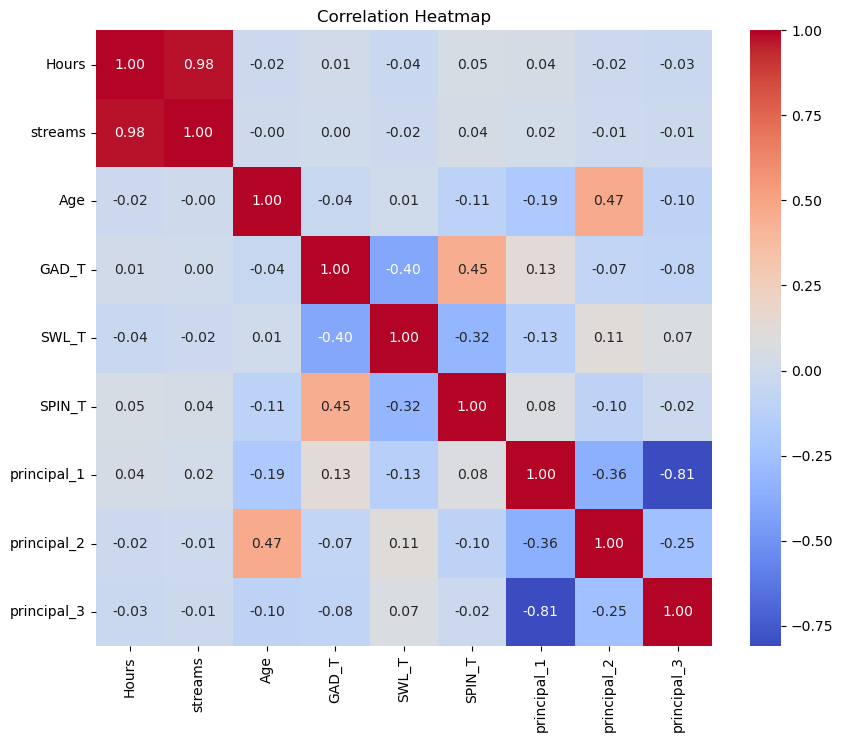

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

# 相関係数行列の計算
correlation_matrix = df_for_analysis.corr()

# ヒートマップの作成
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# プロットの表示
plt.title('Correlation Heatmap')
plt.show()

In [204]:
df_for_analysis['Hours_streams'] = df_for_analysis['Hours'] + df_for_analysis['streams']

df = df_for_analysis.drop(['Hours', 'streams'], axis=1)

/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_32855/3782613969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_analysis['Hours_streams'] = df_for_analysis['Hours'] + df_for_analysis['streams']


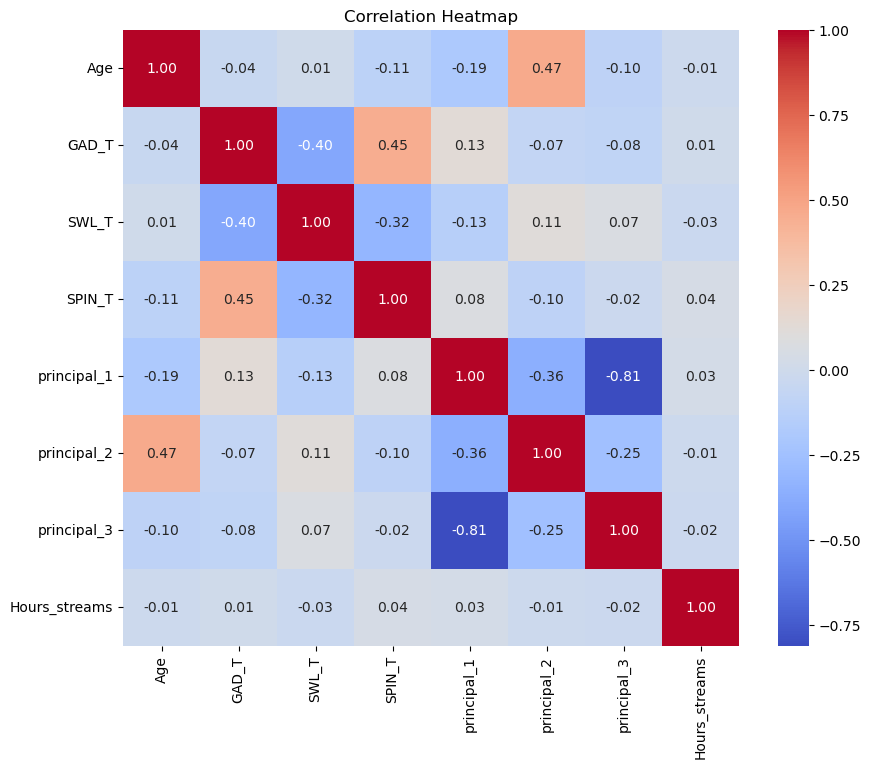

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

# 相関係数行列の計算
correlation_matrix = df_for_analysis.corr()

# ヒートマップの作成
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# プロットの表示
plt.title('Correlation Heatmap')
plt.show()

In [206]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 説明変数と目的変数のデータを準備
X = df.drop(['SWL_T'], axis=1)
y = df['SWL_T']

# 重回帰分析モデルの構築と学習
model = LinearRegression()
model.fit(X, y)

# 重回帰分析結果の表示
print("回帰係数:")
print(model.coef_)
print("切片:")
print(model.intercept_)

# AICの算出
X = sm.add_constant(X)  # 定数項を追加
sm_model = sm.OLS(y, X)
result = sm_model.fit()
aic = result.aic
print("AIC:", aic)

ValueError: could not convert string to float: 'I play for fun'

### 全探索のサンプルコード

In [61]:
###STEP1データをインポートする###
import pandas as pd
import numpy as np
data=np.array([[0,0,0],[1,0,0],[0,1,0],[1,0,0],[1,1,0],[0,0,0],[0,0,1],[0,1,1],[1,1,1]])
(n,p)=np.shape(data)

###STEP1 Prinsipal Pointsの候補ベクトルを作成（ちょっとおしゃれな事やっています）###
pmatrix=np.empty((2**p,p))
for i in range(2**p):
    pmatrix[i,]=(list(format(i, '03b')))#0の後に変数の数がくる(ex.4変数のとき04b)


###STEP2 Prinsipal Pointsを探索###
#Step2　principal pointsを探索
sum2=1000
for i in range (2**p-2):
    for j in range ((i+1),2**p-1):
        for k in range((j+1),2**p):    
            sum1=0
            for num in range (n):
                sum1=sum1+min(p-np.sum(pmatrix[i]==data[num]),p-np.sum(pmatrix[j]==data[num]),p-np.sum(pmatrix[k]==data[num]))
            if sum1<=sum2:
                sum2=sum1
                pp1=i
                pp2=j
                pp3=k
                print('距離',sum2)
                print(list(format(pp1, '03b')) ,list(format(pp2, '03b')),list(format(pp3, '03b')))

距離 6
['0', '0', '0'] ['0', '0', '1'] ['0', '1', '0']
距離 6
['0', '0', '0'] ['0', '0', '1'] ['0', '1', '1']
距離 5
['0', '0', '0'] ['0', '0', '1'] ['1', '0', '0']
距離 5
['0', '0', '0'] ['0', '0', '1'] ['1', '1', '0']
距離 5
['0', '0', '0'] ['0', '0', '1'] ['1', '1', '1']
距離 5
['0', '0', '0'] ['0', '1', '0'] ['0', '1', '1']
距離 5
['0', '0', '0'] ['0', '1', '0'] ['1', '0', '0']
距離 5
['0', '0', '0'] ['0', '1', '0'] ['1', '1', '0']
距離 5
['0', '0', '0'] ['0', '1', '0'] ['1', '1', '1']
距離 4
['0', '0', '0'] ['0', '1', '1'] ['1', '0', '0']
距離 4
['0', '0', '0'] ['1', '0', '0'] ['1', '1', '1']


### 貪欲法のサンプルコード

In [59]:
###STEP1データをインポートする###
import pandas as pd
import numpy as np
data=np.array([[0,0,0],[1,0,0],[0,1,0],[1,0,0],[1,1,0],[0,0,0],[0,0,1],[0,1,1],[1,1,1]])
(n,p)=np.shape(data)

###STEP1 Prinsipal Pointsの候補ベクトルを作成（ちょっとおしゃれな事やっています）###
pmatrix=np.empty((2**p,p))
for i in range(2**p):
    pmatrix[i,]=(list(format(i, '03b')))#0の後に変数の数がくる(ex.4変数のとき04b)


###STEP2 Prinsipal Pointsを探索###
#Step2　principal pointsを探索
sum2=1000
for i in range (2**p):
    sum1=0
    for num in range (n):
        sum1=sum1+p-np.sum(pmatrix[i]==data[num])
    if sum1<=sum2:
        sum2=sum1
        pp1=i
        print('距離',sum2)
for j in range (2**p):
    sum1=0
    for num in range (n):
        sum1=sum1+min(p-np.sum(pmatrix[pp1]==data[num]),p-np.sum(pmatrix[j]==data[num]))
    if sum1<=sum2:
        sum2=sum1
        pp2=j
        print('距離',sum2)
for k in range (2**p):
    sum1=0
    for num in range (n):
        sum1=sum1+min(p-np.sum(pmatrix[pp1]==data[num]),p-np.sum(pmatrix[pp2]==data[num]),p-np.sum(pmatrix[k]==data[num]))
    if sum1<=sum2:
        sum2=sum1
        pp3=k
        print('距離',sum2)
        print(pp1)
        print(pp2)
        print(pp3)

距離 11
距離 11
距離 8
距離 7
距離 7
距離 7
距離 7
距離 6
距離 6
0
7
0
距離 5
0
7
1
距離 5
0
7
2
距離 5
0
7
3
距離 4
0
7
4
